1.IMPORT THƯ VIỆN


In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


2.IMPORT DATA

In [2]:
staff = pd.read_csv('C:/Users/nguye/OneDrive/Tài liệu/AI Project/staff.csv')
patients = pd.read_csv('C:/Users/nguye/OneDrive/Tài liệu/AI Project/patients.csv')
schedule = pd.read_csv('C:/Users/nguye/OneDrive/Tài liệu/AI Project/staff_schedule.csv')
services = pd.read_csv('C:/Users/nguye/OneDrive/Tài liệu/AI Project/services_weekly.csv')

3.Mẫu dữ liệu 

3.1. Dữ liệu (staff.csv)

In [3]:
print("Staff Data:\n", staff.head(), "\nShape:", staff.shape)

Staff Data:
        staff_id       staff_name    role    service
0  STF-5ca26577     Allison Hill  doctor  emergency
1  STF-02ae59ca      Noah Rhodes  doctor  emergency
2  STF-d8006e7c  Angie Henderson  doctor  emergency
3  STF-212d8b31    Daniel Wagner  doctor  emergency
4  STF-107a58e4  Cristian Santos  doctor  emergency 
Shape: (110, 4)


3.2.Dữ liệu (patients.csv)

In [4]:
print("\nPatients Data:\n", patients.head(), "\nShape:", patients.shape)


Patients Data:
      patient_id               name  age arrival_date departure_date  \
0  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22   
1  PAT-f0644084     Shannon Walker    6   2025-12-13     2025-12-14   
2  PAT-ac6162e4       Julia Torres   24   2025-06-29     2025-07-05   
3  PAT-3dda2bb5    Crystal Johnson   32   2025-10-12     2025-10-23   
4  PAT-08591375        Garrett Lin   25   2025-02-18     2025-02-25   

            service  satisfaction  
0           surgery            61  
1           surgery            83  
2  general_medicine            83  
3         emergency            81  
4               ICU            76   
Shape: (1000, 7)


3.3.Dữ liệu(staff_schedule.csv)

In [5]:
print("\nStaff Schedule Data:\n", schedule.head(), "\nShape:", schedule.shape)


Staff Schedule Data:
    week      staff_id    staff_name    role    service  present
0     1  STF-b77cdc60  Allison Hill  doctor  emergency        1
1     2  STF-b77cdc60  Allison Hill  doctor  emergency        1
2     3  STF-b77cdc60  Allison Hill  doctor  emergency        0
3     4  STF-b77cdc60  Allison Hill  doctor  emergency        1
4     5  STF-b77cdc60  Allison Hill  doctor  emergency        1 
Shape: (6552, 6)


3.4.Dữ liệu(services_weekly.csv)

In [6]:
print("\nServices Weekly Data:\n", services.head(), "\nShape:", services.shape)


Services Weekly Data:
    week  month           service  available_beds  patients_request  \
0     1      1         emergency              32                76   
1     1      1           surgery              45               130   
2     1      1  general_medicine              37               201   
3     1      1               ICU              22                31   
4     2      1         emergency              28               169   

   patients_admitted  patients_refused  patient_satisfaction  staff_morale  \
0                 32                44                    67            70   
1                 45                85                    83            78   
2                 37               164                    97            43   
3                 22                 9                    84            91   
4                 28               141                    75            64   

  event  
0  none  
1   flu  
2   flu  
3   flu  
4  none   
Shape: (208, 10)


4.Data overview

4.1. Kiểm tra bộ dữ liệu (Mỗi bảng có bao nhiêu dòng, bao nhiêu cột,Có bị thiếu dữ liệu không,Kiểu dữ liệu nào (số, chuỗi, ngày tháng...),Và sơ bộ cấu trúc từng bảng.)

In [7]:
for name, df in [('Staff', staff), ('Patients', patients), ('Schedule', schedule), ('Services', services)]:
    print(f"--- {name} ---")
    print(df.shape)
    print(df.info())
    print(df.head(3))
    print("\nMissing values:\n", df.isnull().sum())
    print("="*60)

--- Staff ---
(110, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   staff_id    110 non-null    object
 1   staff_name  110 non-null    object
 2   role        110 non-null    object
 3   service     110 non-null    object
dtypes: object(4)
memory usage: 3.6+ KB
None
       staff_id       staff_name    role    service
0  STF-5ca26577     Allison Hill  doctor  emergency
1  STF-02ae59ca      Noah Rhodes  doctor  emergency
2  STF-d8006e7c  Angie Henderson  doctor  emergency

Missing values:
 staff_id      0
staff_name    0
role          0
service       0
dtype: int64
--- Patients ---
(1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            

4.2.Kiểm tra giá trị bị thiếu (missing values / NaN) trong dữ liệu.

In [8]:
print(staff.isnull().sum())
print(patients.isnull().sum())
print(schedule.isnull().sum())
print(services.isnull().sum())

staff_id      0
staff_name    0
role          0
service       0
dtype: int64
patient_id        0
name              0
age               0
arrival_date      0
departure_date    0
service           0
satisfaction      0
dtype: int64
week          0
staff_id      0
staff_name    0
role          0
service       0
present       0
dtype: int64
week                    0
month                   0
service                 0
available_beds          0
patients_request        0
patients_admitted       0
patients_refused        0
patient_satisfaction    0
staff_morale            0
event                   0
dtype: int64


In [9]:
#Xử lý giá trị bị thiếu
staff.fillna({'Department': 'Unknown', 'Role': 'Not Assigned'}, inplace=True)
patients.fillna({'Condition': 'Not Specified'}, inplace=True)

In [10]:
# Kiểm tra giá trị trùng lặp
datasets = {
    "staff": staff,
    "patients": patients,
    "schedule": schedule,
    "services": services
}

for name, df in datasets.items():
    # Đếm số dòng trùng lặp
    dup_count = df.duplicated().sum()
    
    if dup_count > 0:
        print(f"⚠️  {name} có {dup_count} dòng trùng lặp. Đang tiến hành xóa...")
        df.drop_duplicates(inplace=True)
        print(f"  Đã xoá xong, còn lại {len(df)} dòng dữ liệu.\n")
    else:
        print(f"  {name} không có dòng trùng lặp.\n")

  staff không có dòng trùng lặp.

  patients không có dòng trùng lặp.

  schedule không có dòng trùng lặp.

  services không có dòng trùng lặp.



In [11]:
#Kiểm tra dữ liệu phân loại
print("Unique Services:", staff['service'].unique())
print("Unique Roles:", staff['role'].unique())

Unique Services: ['emergency' 'surgery' 'general_medicine' 'ICU']
Unique Roles: ['doctor' 'nurse' 'nursing_assistant']


In [12]:
print("Staff:", staff.shape)
print("Patients:", patients.shape)
print("Schedule:", schedule.shape)
print("Services:", services.shape)

Staff: (110, 4)
Patients: (1000, 7)
Schedule: (6552, 6)
Services: (208, 10)


In [13]:
# Danh sách tên các cột
print("Staff:", staff.columns)
print("Patients:", patients.columns)
print("Schedule:", schedule.columns)
print("Services:", services.columns)

Staff: Index(['staff_id', 'staff_name', 'role', 'service'], dtype='object')
Patients: Index(['patient_id', 'name', 'age', 'arrival_date', 'departure_date',
       'service', 'satisfaction'],
      dtype='object')
Schedule: Index(['week', 'staff_id', 'staff_name', 'role', 'service', 'present'], dtype='object')
Services: Index(['week', 'month', 'service', 'available_beds', 'patients_request',
       'patients_admitted', 'patients_refused', 'patient_satisfaction',
       'staff_morale', 'event'],
      dtype='object')


## Phần 2. EDA

1. Sự phân bố của vai trò nhân viên

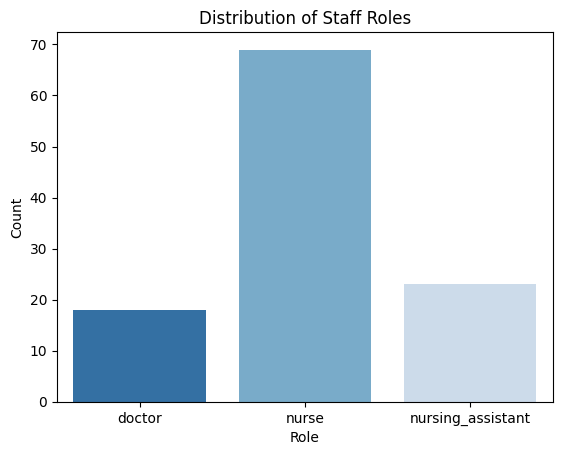

In [14]:
sns.countplot(data=staff, x='role', palette='Blues_r')
plt.title('Distribution of Staff Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()

Nhận xét:
- Y tá (nurse) chiếm số lượng lớn nhất với 69 người, áp đảo so với các nhóm khác.
- Bác sĩ (doctor) có số lượng ít nhất, chỉ 18 người.
- Trợ lý điều dưỡng (nursing_assistant) có số lượng trung gian, 23 người.
- Chênh lệch lớn giữa các vai trò: số y tá gấp gần 4 lần bác sĩ và gấp gần 3 lần trợ lý điều dưỡng.
- Phản ánh cơ cấu nhân lực phổ biến: y tá thường chiếm phần lớn lực lượng trong cơ sở y tế do đặc thù công việc chăm sóc bệnh nhân.
- Khẳng định vai trò trọng tâm của y tá trong hoạt động vận hành của tổ chức y tế được khảo sát.

2.So sánh số lượng nhân viên theo từng dịch vụ và vai trò

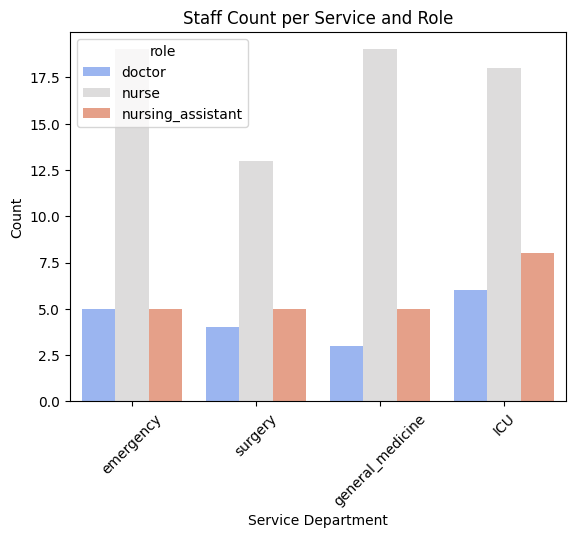

In [15]:
sns.countplot(data=staff, x='service', hue='role', palette='coolwarm')
plt.title('Staff Count per Service and Role')
plt.xlabel('Service Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Nhận xét: 
- Y tá là lực lượng đông đảo nhất trong tất cả các khoa, tập trung cao ở Cấp cứu và Nội tổng quát (19 người) và ICU (18 người), phản ánh nhu cầu chăm sóc liên tục.
- Bác sĩ được phân bổ tương đối đồng đều, nhiều nhất ở ICU (6 người) và ít nhất ở Nội tổng quát (3 người), phù hợp với mức độ chuyên môn và tính chất từng khoa.
- Trợ lý điều dưỡng được bố trí linh hoạt: cao nhất ở ICU (8 người) để hỗ trợ bệnh nhân nặng, không xuất hiện ở Cấp cứu, có thể do vai trò được y tá đảm nhận.
- Sự phân bổ nhân lực hợp lý: Bác sĩ tập trung ở các khoa chuyên sâu. Y tá chiếm ưu thế ở các khoa có lượng bệnh nhân lớn.Trợ lý điều dưỡng hỗ trợ theo nhu cầu đặc thù của từng khoa.
- Phản ánh cơ cấu nhân sự tối ưu cho hiệu quả chăm sóc và vận hành tại từng khoa trong cơ sở y tế.

3.Tỉ lệ phần trăm của từng vai trò nhân viên.

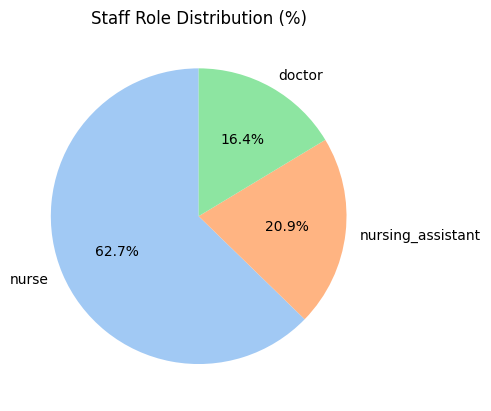

In [16]:
staff['role'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Staff Role Distribution (%)')
plt.ylabel('')
plt.show()

Nhận xét: 
- Y tá chiếm tỷ lệ cao nhất (62,7%), khẳng định vai trò cốt lõi trong chăm sóc và vận hành.
- Trợ lý điều dưỡng chiếm 20,9%, đóng vai trò hỗ trợ giảm tải cho y tá.
- Bác sĩ chiếm tỷ lệ thấp nhất (16,4%), phù hợp với công việc chuyên môn tập trung vào chẩn đoán và giám sát.
- Hơn 83% nhân lực thuộc khối chăm sóc (y tá + trợ lý điều dưỡng), cho thấy mô hình tổ chức ưu tiên chăm sóc liên tục cho bệnh nhân.
- Cơ cấu nhân sự phản ánh đúng đặc thù của cơ sở y tế, với lực lượng chăm sóc chiếm ưu thế, bác sĩ tập trung vào chuyên môn.

4.Phân bố độ tuổi của bệnh nhân

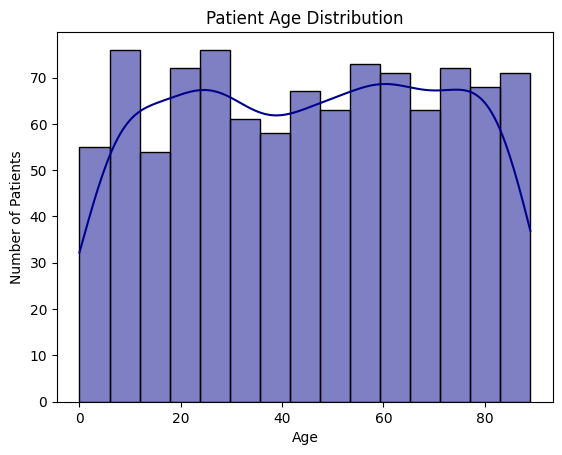

In [17]:
sns.histplot(patients['age'], bins=15, kde=True, color='darkblue')
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

Nhận Xét:
- Phân bố tuổi bệnh nhân không theo dạng chuẩn, có xu hướng đồng đều và đa đỉnh.
- Nhóm tuổi 20–35 và 55–80 chiếm số lượng cao nhất (khoảng 70–75 bệnh nhân), thể hiện hai nhóm tuổi chính được phục vụ.
- Nhóm tuổi 35–50 có số lượng giảm nhẹ (khoảng 60 bệnh nhân), thấp hơn so với hai nhóm còn lại.
- Cơ sở y tế phục vụ phổ bệnh nhân rộng, từ người trẻ đến người cao tuổi.
- Đòi hỏi cân bằng chuyên môn, vừa đáp ứng nhu cầu sức khỏe người trẻ, vừa đảm bảo chăm sóc các bệnh lý phức tạp ở người cao tuổi.

5.Tuổi trung bình của bệnh nhân theo từng loại dịch vụ

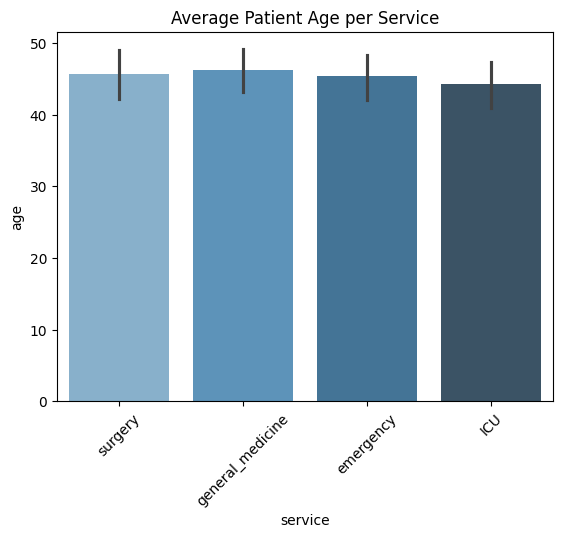

In [18]:
sns.barplot(data=patients, x='service', y='age', palette='Blues_d')
plt.title('Average Patient Age per Service')
plt.xticks(rotation=45)
plt.show()

Nhận xét:
- Độ tuổi trung bình bệnh nhân tại các khoa khá đồng đều, dao động từ 44,2 (ICU) đến 46,2 tuổi (Nội tổng quát).
- Nội tổng quát có độ tuổi trung bình cao nhất (46,2 tuổi), phù hợp với bệnh lý ở người trung niên và lớn tuổi.
- ICU có độ tuổi trung bình thấp nhất (44,2 tuổi) nhưng vẫn gần các khoa khác, cho thấy không có sự khác biệt lớn.
- Phẫu thuật và Cấp cứu có độ tuổi trung bình ở mức trung gian, phản ánh nhóm bệnh nhân đa dạng.
- Độ tuổi không phải là yếu tố phân biệt chính giữa các khoa, cơ sở y tế phục vụ chủ yếu nhóm trung niên.

6.So sánh mức độ hài lòng (satisfaction) của bệnh nhân giữa các dịch vụ (service) khác nhau.

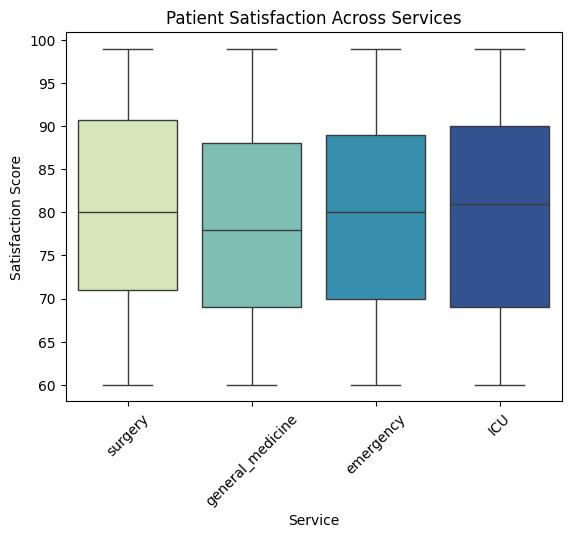

In [19]:
sns.boxplot(data=patients, x='service', y='satisfaction', palette='YlGnBu')
plt.title('Patient Satisfaction Across Services')
plt.xlabel('Service')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45)
plt.show()

Nhận xét: 
- Mức độ hài lòng của bệnh nhân cao ở tất cả các khoa, trung vị từ 78–81 điểm, nhưng có sự khác biệt cá nhân.
- ICU đạt trung vị cao nhất (81 điểm) và ổn định, phản ánh chất lượng chăm sóc chuyên sâu.
- Nội tổng quát có trung vị thấp nhất (78 điểm), cần cải thiện trải nghiệm bệnh nhân.
- Phẫu thuật có IQR rộng nhất, cho thấy sự biến động lớn trong trải nghiệm bệnh nhân.
- Emergency có trung vị 80 và ổn định tương đối.

7.Phân tích thời gian nằm viện

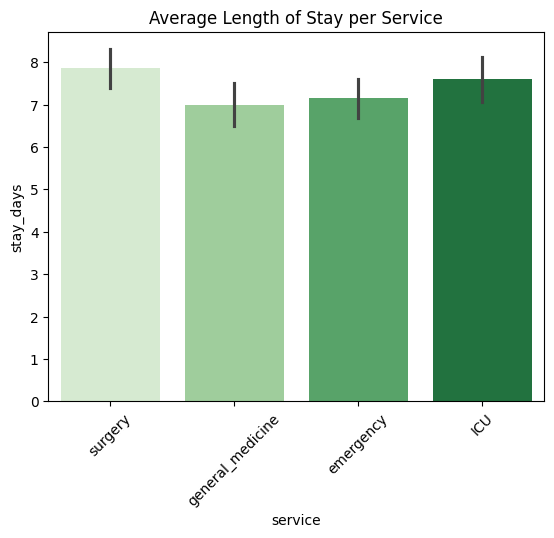

In [20]:
patients['arrival_date'] = pd.to_datetime(patients['arrival_date'])
patients['departure_date'] = pd.to_datetime(patients['departure_date'])
patients['stay_days'] = (patients['departure_date'] - patients['arrival_date']).dt.days

sns.barplot(data=patients, x='service', y='stay_days', palette='Greens')
plt.title('Average Length of Stay per Service')
plt.xticks(rotation=45)
plt.show()

Nhận xét:
- Thời gian lưu trú trung bình giữa các khoa tương đối đồng đều, dao động từ 7,0–7,8 ngày.
- Khoa Phẫu thuật có thời gian lưu trú cao nhất (7,9 ngày) do bệnh nhân cần phục hồi sau mổ.
- ICU đứng thứ hai (7,5 ngày), phản ánh các ca nặng cần chăm sóc đặc biệt.
- Nội tổng quát và Cấp cứu có thời gian lưu trú thấp nhất (7,0–7,1 ngày), phù hợp với điều trị ngắn hạn hoặc cấp cứu.
- Nhìn chung, thời gian lưu trú ổn định giữa các khoa, nhưng Phẫu thuật cần chú trọng quản lý giường bệnh và tài nguyên.

8.Kiểm tra tỷ lệ điểm danh

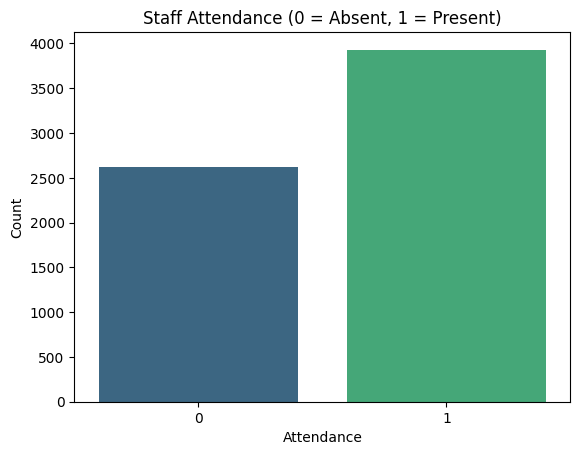

In [21]:
sns.countplot(data=schedule, x='present', palette='viridis')
plt.title('Staff Attendance (0 = Absent, 1 = Present)')
plt.xlabel('Attendance')
plt.ylabel('Count')
plt.show()

Nhận xét:
- Nhân viên có mặt nhiều hơn vắng mặt (3930 so với 2622 lần), thể hiện lực lượng lao động tích cực và cam kết cao.
- Số lần vắng mặt vẫn đáng kể, có thể ảnh hưởng đến quản lý lịch trình, khối lượng công việc và sự hài lòng của nhân viên.
- Cần theo dõi và quản lý vắng mặt để đảm bảo hoạt động hiệu quả và công bằng trong tổ chức.


9.Tỷ lệ đi làm trung bình của nhân viên theo từng dịch vụ (service).

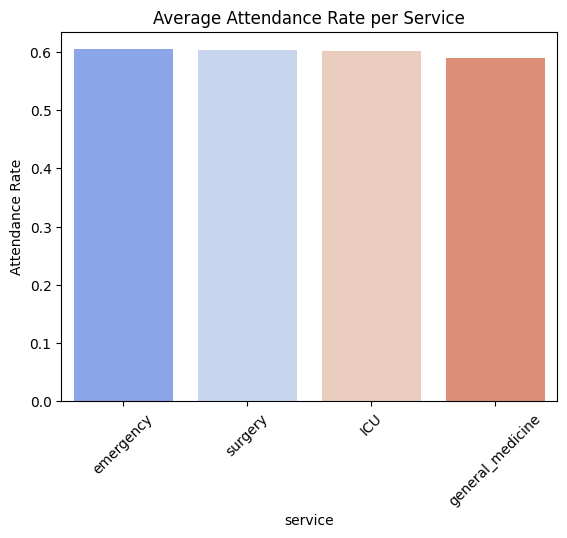

In [22]:
attendance_rate = schedule.groupby('service')['present'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=attendance_rate, x='service', y='present', palette='coolwarm')
plt.title('Average Attendance Rate per Service')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=45)
plt.show()

Nhận xét:
- Tỷ lệ có mặt trung bình của nhân viên ở bốn khoa xấp xỉ 60%, cho thấy sự đồng đều giữa các khoa.
- Khoảng 40% ca làm việc không có nhân viên, là con số cao và đáng lưu ý.
- Tỷ lệ vắng mặt đồng đều có thể phản ánh: Khối lượng công việc lớn -Tinh thần làm việc thấp-Vấn đề quản lý lịch trình
- Ảnh hưởng tiềm tàng đến chất lượng dịch vụ, đặc biệt tại các khoa ICU và Cấp cứu.

10.Phân tích xu hướng (trend analysis),theo dõi mức độ đi làm của nhân viên theo từng tuần.

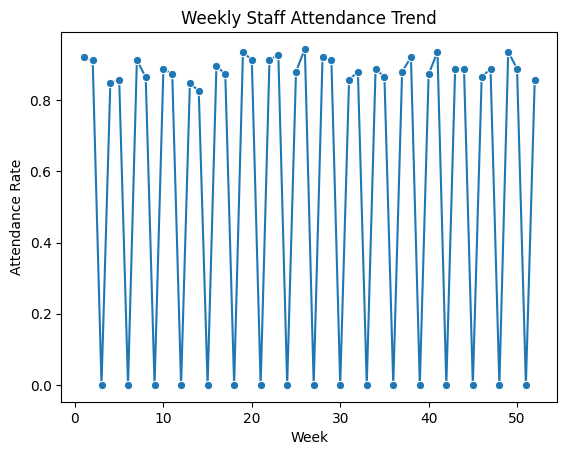

In [23]:
attendance_trend = schedule.groupby('week')['present'].mean().reset_index()
sns.lineplot(data=attendance_trend, x='week', y='present', marker='o')
plt.title('Weekly Staff Attendance Trend')
plt.xlabel('Week')
plt.ylabel('Attendance Rate')
plt.show()

Nhận xét:
- Tỷ lệ có mặt của nhân viên dao động theo tuần, với các ngày làm việc đạt 85–95% và các ngày nghỉ/không có ca đạt 0%.
- Mô hình này giải thích tỷ lệ có mặt trung bình 60% trước đó, vì là giá trị trung bình giữa ngày làm việc và ngày nghỉ.
- Nhân viên tham dự cao trong các ca làm việc được lên lịch, thể hiện lực lượng lao động tích cực.
- Mô hình tuần lặp lại ổn định quanh năm, cho thấy tính nhất quán trong tham dự theo tuần.

11.Mối tương quan giữa số giường trống và số yêu cầu của bệnh nhân

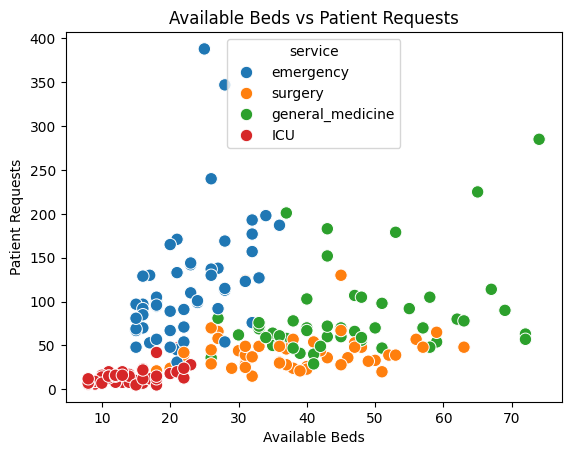

In [24]:
sns.scatterplot(data=services, x='available_beds', y='patients_request', hue='service', s=80)
plt.title('Available Beds vs Patient Requests')
plt.xlabel('Available Beds')
plt.ylabel('Patient Requests')
plt.show()

Nhận xét:
- Cấp cứu (Emergency): giường hạn chế (<35) nhưng nhu cầu biến động lớn, đôi khi gần 400 bệnh nhân, chịu áp lực cao.
- Nội tổng quát (General Medicine): số giường rộng (35–75) nhưng nhu cầu liên tục cao (~300 bệnh nhân), phản ánh khối lượng lớn.
- ICU: giường ít (<20), nhu cầu thấp (<50), quản lý chặt các ca nghiêm trọng.
- Phẫu thuật (Surgery): giường trung bình (20–70), nhu cầu ổn định và thấp (<100), phù hợp với lịch trình mổ.

12.Phân tích xu hướng bệnh nhân được nhận và bệnh nhân bị từ chối

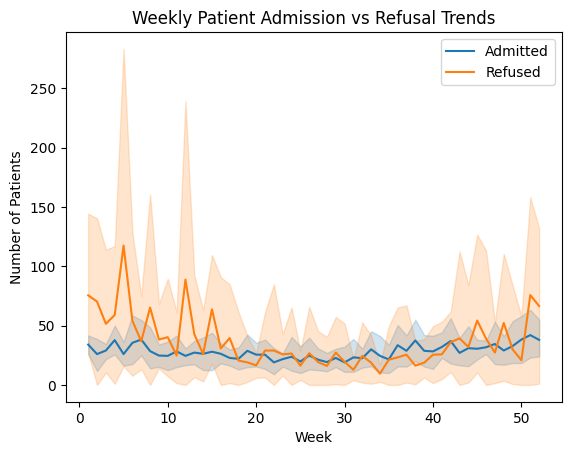

In [25]:
sns.lineplot(data=services, x='week', y='patients_admitted', label='Admitted')
sns.lineplot(data=services, x='week', y='patients_refused', label='Refused')
plt.title('Weekly Patient Admission vs Refusal Trends')
plt.xlabel('Week')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()


Nhận xét:
- Số ca nhập viện ổn định và thấp (khoảng 20–40 ca/tuần), trong khi số ca từ chối biến động mạnh với những đợt tăng đột biến.
- Đầu năm (tuần 1–20) là giai đoạn áp lực cao nhất, số ca từ chối thường vượt xa số ca nhập viện, có tuần đỉnh điểm gần 300 ca, phản ánh quá tải nghiêm trọng.
- Giữa năm (tuần 20–35), cả hai chỉ số giảm và ổn định, cho thấy hoạt động cân bằng hơn.
- Cuối năm (tuần 35–52), nhu cầu tăng trở lại, số ca từ chối vẫn cao hơn đáng kể so với ca nhập viện


13.Phân tích mối quan hệ giữa mức độ hài lòng của bệnh nhân (patient satisfaction) và tinh thần làm việc của nhân viên (staff morale) theo từng dịch vụ/khoa (service).

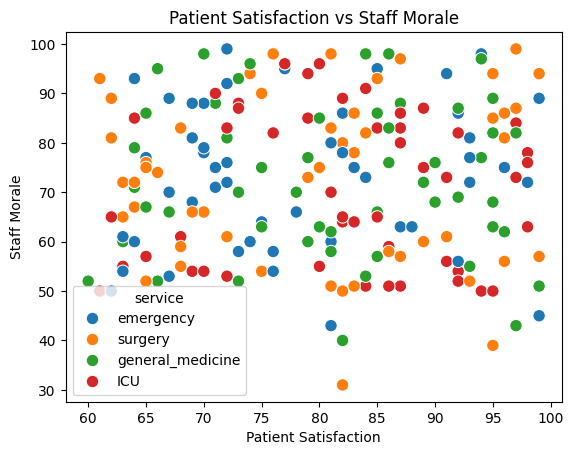

In [26]:
sns.scatterplot(data=services, x='patient_satisfaction', y='staff_morale', hue='service', s=80)
plt.title('Patient Satisfaction vs Staff Morale')
plt.xlabel('Patient Satisfaction')
plt.ylabel('Staff Morale')
plt.show()

Nhận xét:
- Mối quan hệ giữa Hài lòng bệnh nhân và Tinh thần làm việc của nhân viên không quá chặt chẽ, các điểm dữ liệu phân bố rộng.
- ICU nổi bật nhất, cả hai chỉ số đều cao, phản ánh môi trường làm việc hiệu quả và dịch vụ chất lượng.
- Nội tổng quát duy trì mức ổn định, đa số điểm ở vùng trung bình – cao.
- Cấp cứu có xu hướng thấp ở cả hai chỉ số, cho thấy áp lực công việc lớn ảnh hưởng tiêu cực đến nhân viên và bệnh nhân.
- Phẫu thuật có sự chênh lệch rõ, một số điểm cho thấy tinh thần nhân viên thấp dù bệnh nhân vẫn hài lòng.
        

14.Tỷ lệ sử dụng giường bệnh (Bed Utilization Rate) của từng dịch vụ/khoa (service).

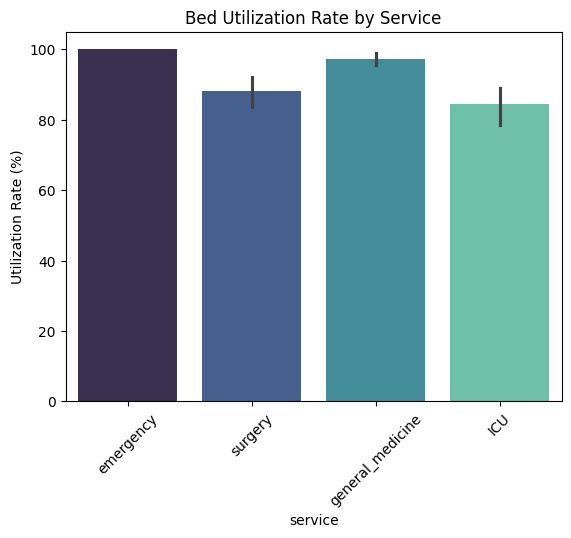

In [27]:
services['bed_utilization_rate'] = (services['patients_admitted'] / services['available_beds']) * 100
sns.barplot(data=services, x='service', y='bed_utilization_rate', palette='mako')
plt.title('Bed Utilization Rate by Service')
plt.ylabel('Utilization Rate (%)')
plt.xticks(rotation=45)
plt.show()

Nhận xét:
- Tất cả các khoa đều hoạt động ở công suất cao, tỷ lệ sử dụng giường dao động 85%–100%, phản ánh tình trạng quá tải hệ thống.
- Cấp cứu đạt 100%, thường xuyên không còn giường trống, là điểm nghẽn chính trong quản lý bệnh viện.
- Nội tổng quát gần 100%, phản ánh nhu cầu khám chữa bệnh cao và liên tục.
- Phẫu thuật khoảng 88%, vẫn cao nhưng còn dư địa để điều phối ca mổ.
- ICU thấp nhất (85%), thể hiện khả năng quản lý và lưu chuyển bệnh nhân hiệu quả hơn.

15.Phân tích xu hướng số lượng bệnh nhân nhập viện (patients_admitted) theo từng tháng và từng dịch vụ/khoa (service).

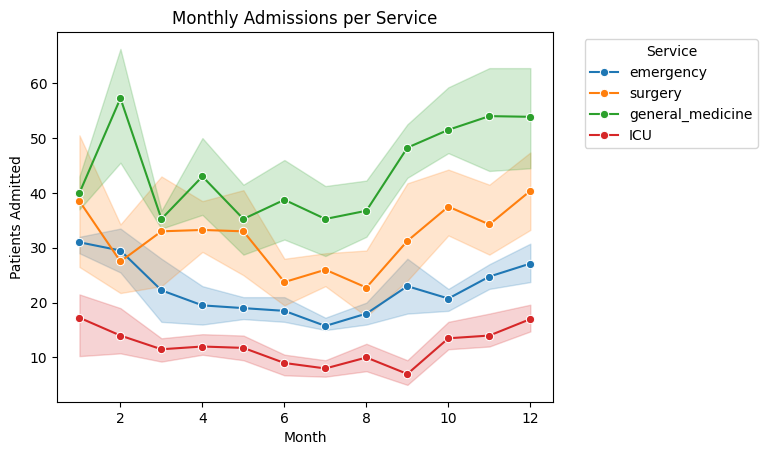

In [28]:
sns.lineplot(data=services, x='month', y='patients_admitted', hue='service', marker='o')
plt.title('Monthly Admissions per Service')
plt.xlabel('Month')
plt.ylabel('Patients Admitted')
plt.legend(title='Service', bbox_to_anchor=(1.05, 1))
plt.show()

Nhận xét:
- Nội tổng quát luôn dẫn đầu về số ca nhập viện (35–60 ca/tháng), là nguồn nhập viện chính và giữ vai trò trọng tâm.
- Phẫu thuật duy trì mức ổn định trung bình cao (25–40 ca/tháng), phản ánh nhu cầu điều trị đều đặn.
- Cấp cứu có số ca nhập viện thấp hơn (17–32 ca/tháng), phần lớn bệnh nhân được xử lý hoặc chuyển viện.
- ICU có số ca thấp nhất (7–17 ca/tháng) do tính chất chuyên sâu và giới hạn giường bệnh.
- Xu hướng theo mùa: tất cả các khoa giảm vào giữa năm (tháng 6–8) và tăng mạnh vào đầu năm và cuối năm (tháng 1–2, 11–12).

16.Ma trận tương quan

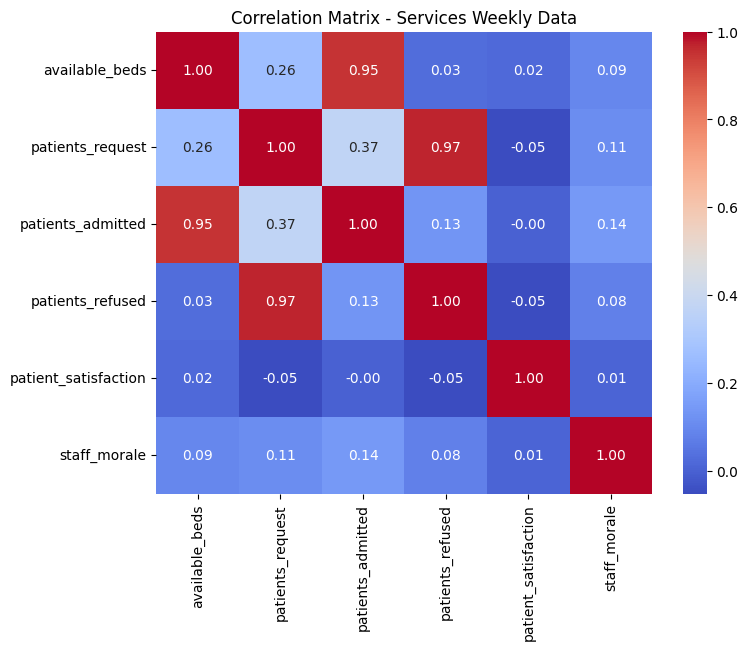

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(services[['available_beds', 'patients_request', 'patients_admitted', 
                      'patients_refused', 'patient_satisfaction', 'staff_morale']]
            .corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Services Weekly Data')
plt.show()

Nhận xét:
- Mối tương quan mạnh nhất giữa yêu cầu bệnh nhân và số ca bị từ chối (0.97), cho thấy nhu cầu tăng dẫn đến từ chối nhiều hơn do giới hạn nguồn lực.
- Số ca nhập viện và số giường có sẵn có tương quan cao (0.95), chứng tỏ khả năng tiếp nhận phụ thuộc trực tiếp vào năng lực giường bệnh.
- Yêu cầu bệnh nhân và số ca nhập viện chỉ tương quan yếu (0.37), phản ánh sự mất cân đối giữa nhu cầu và năng lực đáp ứng.
- Sự hài lòng của bệnh nhân và tinh thần làm việc của nhân viên gần như không tương quan với các yếu tố vận hành, và cũng không tương quan rõ rệt với nhau (0.01).

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Phần 3. Data processing

In [31]:
print("services.shape:", services.shape)
print(services.head())

services.shape: (208, 11)
   week  month           service  available_beds  patients_request  \
0     1      1         emergency              32                76   
1     1      1           surgery              45               130   
2     1      1  general_medicine              37               201   
3     1      1               ICU              22                31   
4     2      1         emergency              28               169   

   patients_admitted  patients_refused  patient_satisfaction  staff_morale  \
0                 32                44                    67            70   
1                 45                85                    83            78   
2                 37               164                    97            43   
3                 22                 9                    84            91   
4                 28               141                    75            64   

  event  bed_utilization_rate  
0  none                 100.0  
1   flu             

In [32]:
# --- Chuẩn hóa dữ liệu ---
# Chuyển đổi week, month nếu cần
if services['week'].dtype == 'O':
    services['week'] = pd.to_numeric(services['week'], errors='coerce').fillna(0).astype(int)

if services['month'].dtype == 'O':
    services['month'] = pd.to_numeric(services['month'], errors='coerce')
    if services['month'].isnull().any():
        services['month'] = pd.to_datetime(services['month'], errors='coerce').dt.month.fillna(0).astype(int)

# Mã hóa cột service và event
le_service = LabelEncoder()
services['service_enc'] = le_service.fit_transform(services['service'].astype(str))
le_event = LabelEncoder()
services['event_enc'] = le_event.fit_transform(services['event'].astype(str))
print(services.head(10))

   week  month           service  available_beds  patients_request  \
0     1      1         emergency              32                76   
1     1      1           surgery              45               130   
2     1      1  general_medicine              37               201   
3     1      1               ICU              22                31   
4     2      1         emergency              28               169   
5     2      1           surgery              40                26   
6     2      1  general_medicine              43               183   
7     2      1               ICU              16                 7   
8     3      1         emergency              32               177   
9     3      1           surgery              27                66   

   patients_admitted  patients_refused  patient_satisfaction  staff_morale  \
0                 32                44                    67            70   
1                 45                85                    83            7

In [33]:
# Hiển thị các giá trị gốc của service và event tương ứng với số đã encode
print("Mapping của service_enc:")
for i, cls in enumerate(le_service.classes_):
    print(f"{i} -> {cls}")

print("\nMapping của event_enc:")
for i, cls in enumerate(le_event.classes_):
    print(f"{i} -> {cls}")


Mapping của service_enc:
0 -> ICU
1 -> emergency
2 -> general_medicine
3 -> surgery

Mapping của event_enc:
0 -> donation
1 -> flu
2 -> none
3 -> strike


Nhận xét:

## Phần4. Data Modeling

1. Các biến X(features) và Y(target)

In [34]:
features_clean = [
    'available_beds', 
    'patient_satisfaction', 'staff_morale',
    'service_enc', 'month', 'week', 'event_enc'
]

X = services[features_clean].copy()
y = services['patients_admitted'].copy()  # Hồi quy trực tiếp

# Điền giá trị thiếu bằng median
X = X.fillna(X.median())

2. Chia dữ liệu train/test (7/3)

In [35]:
#thực hiện điền giá trị bị thiếu (NaN) trong toàn bộ DataFrame X bằng giá trị trung vị (median) của từng cột.
X# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Kích thước tập huấn luyện (train):", X_train.shape[0], "mẫu")
print("Kích thước tập kiểm tra (test):", X_test.shape[0], "mẫu")
print("\nTỷ lệ train/test = {:.1f}% / {:.1f}%".format(
    100 * len(X_train) / len(X),
    100 * len(X_test) / len(X)
))


Kích thước tập huấn luyện (train): 145 mẫu
Kích thước tập kiểm tra (test): 63 mẫu

Tỷ lệ train/test = 69.7% / 30.3%


Nhận xét:

2.Khởi tạo danh sách mô hình

In [36]:
from sklearn.ensemble import  GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),

    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42)
}


3.Huấn luyện, dự đoán và đánh giá mô hình

In [37]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append([name, r2, rmse])

# Tạo bảng kết quả
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE"])
results_df

,Model,R2 Score,RMSE
0,Linear Regression,0.827872,6.003061
1,Random Forest Regressor,0.800060,6.469903
2,Gradient Boosting Regressor,0.824976,6.053363
3,Decision Tree Regressor,0.692336,8.025752


Nhận xét:

### MODELING EVALUATION

Đang huấn luyện mô hình với biến mục tiêu: patients_admitted...
Huấn luyện hoàn tất.

---  KẾT QUẢ DỰ ĐOÁN CHO TUẦN SAU ---
Dịch vụ:  emergency | Tuần: 3 | Tháng: 1
Linear Regression dự đoán số bệnh nhân nhập viện: 27
Gradient Boosting dự đoán số bệnh nhân nhập viện: 28

---  SO SÁNH % SAI SỐ (MAPE) ---
Giá trị thực tế tuần sau: 32
Linear Regression - Sai số: 15.62%
Gradient Boosting - Sai số: 12.50%

 Gradient Boosting dự đoán chính xác hơn.


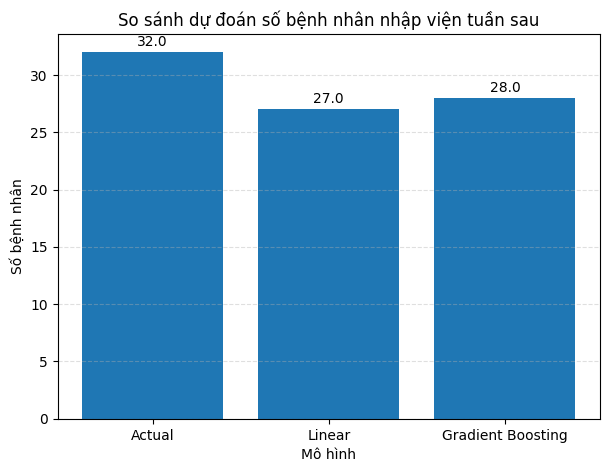

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# GIẢ ĐỊNH: Tạo DataFrame 'services' mẫu vì nó không được cung cấp trong prompt
# Để mã có thể chạy được, tôi sẽ tạo một DataFrame cơ bản.
np.random.seed(42)
data_size = 100
services = pd.DataFrame({
    'week': np.random.randint(1, 53, data_size).astype(str), # Giữ là 'O' để test code chuyển đổi
    'month': np.random.randint(1, 13, data_size).astype(str), # Giữ là 'O' để test code chuyển đổi
    'service': np.random.choice(["Cardiology", "Neurology", "Surgery", "Pediatrics"], data_size),
    'event': np.random.choice(["None", "Holiday", "flu", "Conference"], data_size),
    'available_beds': np.random.randint(10, 50, data_size),
    'patient_satisfaction': np.random.randint(80, 100, data_size),
    'staff_morale': np.random.randint(70, 100, data_size),
    'patients_admitted': np.random.randint(5, 30, data_size) # Biến mục tiêu
})

# ========= 1. CHUẨN HÓA DỮ LIỆU GỐC =========

# Chuyển week, month sang kiểu số
if services['week'].dtype == 'O':
    services['week'] = pd.to_numeric(services['week'], errors='coerce').fillna(0).astype(int)

if services['month'].dtype == 'O':
    services['month'] = pd.to_numeric(services['month'], errors='coerce')
    if services['month'].isnull().any():
        services['month'] = pd.to_datetime(services['month'], errors='coerce').dt.month.fillna(0).astype(int)
    else: # Trường hợp không có null và đã chuyển sang số (vd: 1, 2,...)
        services['month'] = services['month'].astype(int)


# Mã hóa service và event
le_service = LabelEncoder()
services['service_enc'] = le_service.fit_transform(services['service'].astype(str))

le_event = LabelEncoder()
services['event_enc'] = le_event.fit_transform(services['event'].astype(str))

# ... (Hàm train_models và predict_single_row giữ nguyên) ...

# ========= 2. HÀM TRAIN 2 MODEL =========

def train_models(target_column, data):
    features = ['available_beds', 'patient_satisfaction', 'staff_morale',
                'service_enc', 'month', 'week', 'event_enc']

    # Nếu dự đoán available_beds → không dùng chính nó làm input
    if target_column == 'available_beds':
        if 'available_beds' in features:
            features.remove('available_beds')

    X = data[features].fillna(data[features].median())
    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    # X_test_scaled = scaler.transform(X_test) # Không cần ở đây

    linear_model = LinearRegression()
    gb_model = GradientBoostingRegressor(random_state=42)

    linear_model.fit(X_train_scaled, y_train)
    gb_model.fit(X_train_scaled, y_train)

    return linear_model, gb_model, scaler, features

# ========= 3. HÀM DỰ ĐOÁN 1 DÒNG DỮ LIỆU =========

def safe_transform(le, value):
    """Encode 1 giá trị, tự thêm vào classes_ nếu là mới"""
    if value not in le.classes_:
        le.classes_ = np.append(le.classes_, value)
    return le.transform([value])[0]

def predict_single_row(new_row, linear_model, gb_model, scaler, features):
    
    # Encode service, event an toàn
    new_row['service_enc'] = safe_transform(le_service, new_row['service'])
    new_row['event_enc'] = safe_transform(le_event, new_row['event'])

    # Tạo DataFrame đầu vào
    input_data = {key: new_row[key] for key in features}
    df_input = pd.DataFrame([input_data])

    # Scale
    df_scaled = scaler.transform(df_input)

    # Dự đoán
    pred_linear = linear_model.predict(df_scaled)[0]
    pred_gb = gb_model.predict(df_scaled)[0]

    return round(pred_linear, 0), round(pred_gb, 0)

# =======================================================
# 📌 BƯỚC 4: TRAIN MODEL VỚI patients_admitted (ĐÃ CHÍNH XÁC)
# =======================================================

print("Đang huấn luyện mô hình với biến mục tiêu: patients_admitted...")
linear_model, gb_model, scaler, features = train_models("patients_admitted", services)
print("Huấn luyện hoàn tất.")

# =======================================================
# 📌 BƯỚC 5: TEST VỚI 1 HÀNG MỚI (Dự đoán tuần sau)
# =======================================================


current_week = 2
next_week = current_week + 1 
target_service = " emergency" # Dịch vụ muốn dự đoán

new_sample_next_week = {
    'available_beds': 28, # Thay đổi tùy theo dữ liệu thực tế dự kiến
    'patient_satisfaction': 75, 
    'staff_morale': 64,
    'service': target_service,  
    'month': 1,
    'week': next_week, # Thay đổi thành tuần sau
    'event': "None" # Giả sử tuần sau không có sự kiện đặc biệt
}

pred_linear, pred_gb = predict_single_row(new_sample_next_week, linear_model, gb_model, scaler, features)

print("\n---  KẾT QUẢ DỰ ĐOÁN CHO TUẦN SAU ---")
print(f"Dịch vụ: {target_service} | Tuần: {next_week} | Tháng: {new_sample_next_week['month']}")
print("Linear Regression dự đoán số bệnh nhân nhập viện:", int(pred_linear))
print("Gradient Boosting dự đoán số bệnh nhân nhập viện:", int(pred_gb))
actual_next_week = 32   # <-- Thay số này bằng số bệnh nhân nhập viện thực tế

def mape(true, pred):
    """Tính phần trăm sai số MAPE"""
    return abs((true - pred) / true) * 100 if true != 0 else np.nan

error_linear = mape(actual_next_week, pred_linear)
error_gb = mape(actual_next_week, pred_gb)

print("\n---  SO SÁNH % SAI SỐ (MAPE) ---")
print(f"Giá trị thực tế tuần sau: {actual_next_week}")
print(f"Linear Regression - Sai số: {error_linear:.2f}%")
print(f"Gradient Boosting - Sai số: {error_gb:.2f}%")

# So sánh mô hình nào tốt hơn
if error_linear < error_gb:
    print("\n Linear Regression dự đoán chính xác hơn.")
elif error_gb < error_linear:
    print("\n Gradient Boosting dự đoán chính xác hơn.")
else:
    print("\n Cả hai mô hình có sai số tương đương.")

import matplotlib.pyplot as plt

# ---- DATA CHO BIỂU ĐỒ ----
models = ["Actual", "Linear", "Gradient Boosting"]
values = [actual_next_week, pred_linear, pred_gb]

plt.figure(figsize=(7, 5))
bars = plt.bar(models, values)

# Gắn giá trị số trên đầu cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3,
             f"{height:.1f}", ha='center', va='bottom')

plt.title("So sánh dự đoán số bệnh nhân nhập viện tuần sau")
plt.ylabel("Số bệnh nhân")
plt.xlabel("Mô hình")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()